In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
df = pd.read_csv("data/BankChurners.csv")
df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
        axis=1, inplace=True)

In [3]:
display(df.head())
print(df.isna().sum())


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [4]:
print(df.groupby("Attrition_Flag")["CLIENTNUM"].count())
print(df.groupby("Education_Level")["CLIENTNUM"].count())
print(df.groupby("Marital_Status")["CLIENTNUM"].count())
print(df.groupby("Income_Category")["CLIENTNUM"].count())
print(df.groupby("Card_Category")["CLIENTNUM"].count())

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: CLIENTNUM, dtype: int64
Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
Name: CLIENTNUM, dtype: int64
Marital_Status
Divorced     748
Married     4687
Single      3943
Unknown      749
Name: CLIENTNUM, dtype: int64
Income_Category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
Name: CLIENTNUM, dtype: int64
Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
Name: CLIENTNUM, dtype: int64


Give some order to ordered categorical data

In [5]:
income_map = {'Unknown': 0, '$40K - $60K': 1, '$60K - $80K': 2, 
               '$80K - $120K': 3, '$120K +': 4}
education_map = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 
               'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
df["Income"] = df["Income_Category"].map(income_map)
df["Education"] = df["Education_Level"].map(education_map)

In [6]:
jump_ship = df[df["Attrition_Flag"] == "Attrited Customer"]
loyal = jump_ship[jump_ship["Attrition_Flag"] != "Attrited Customer"]

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

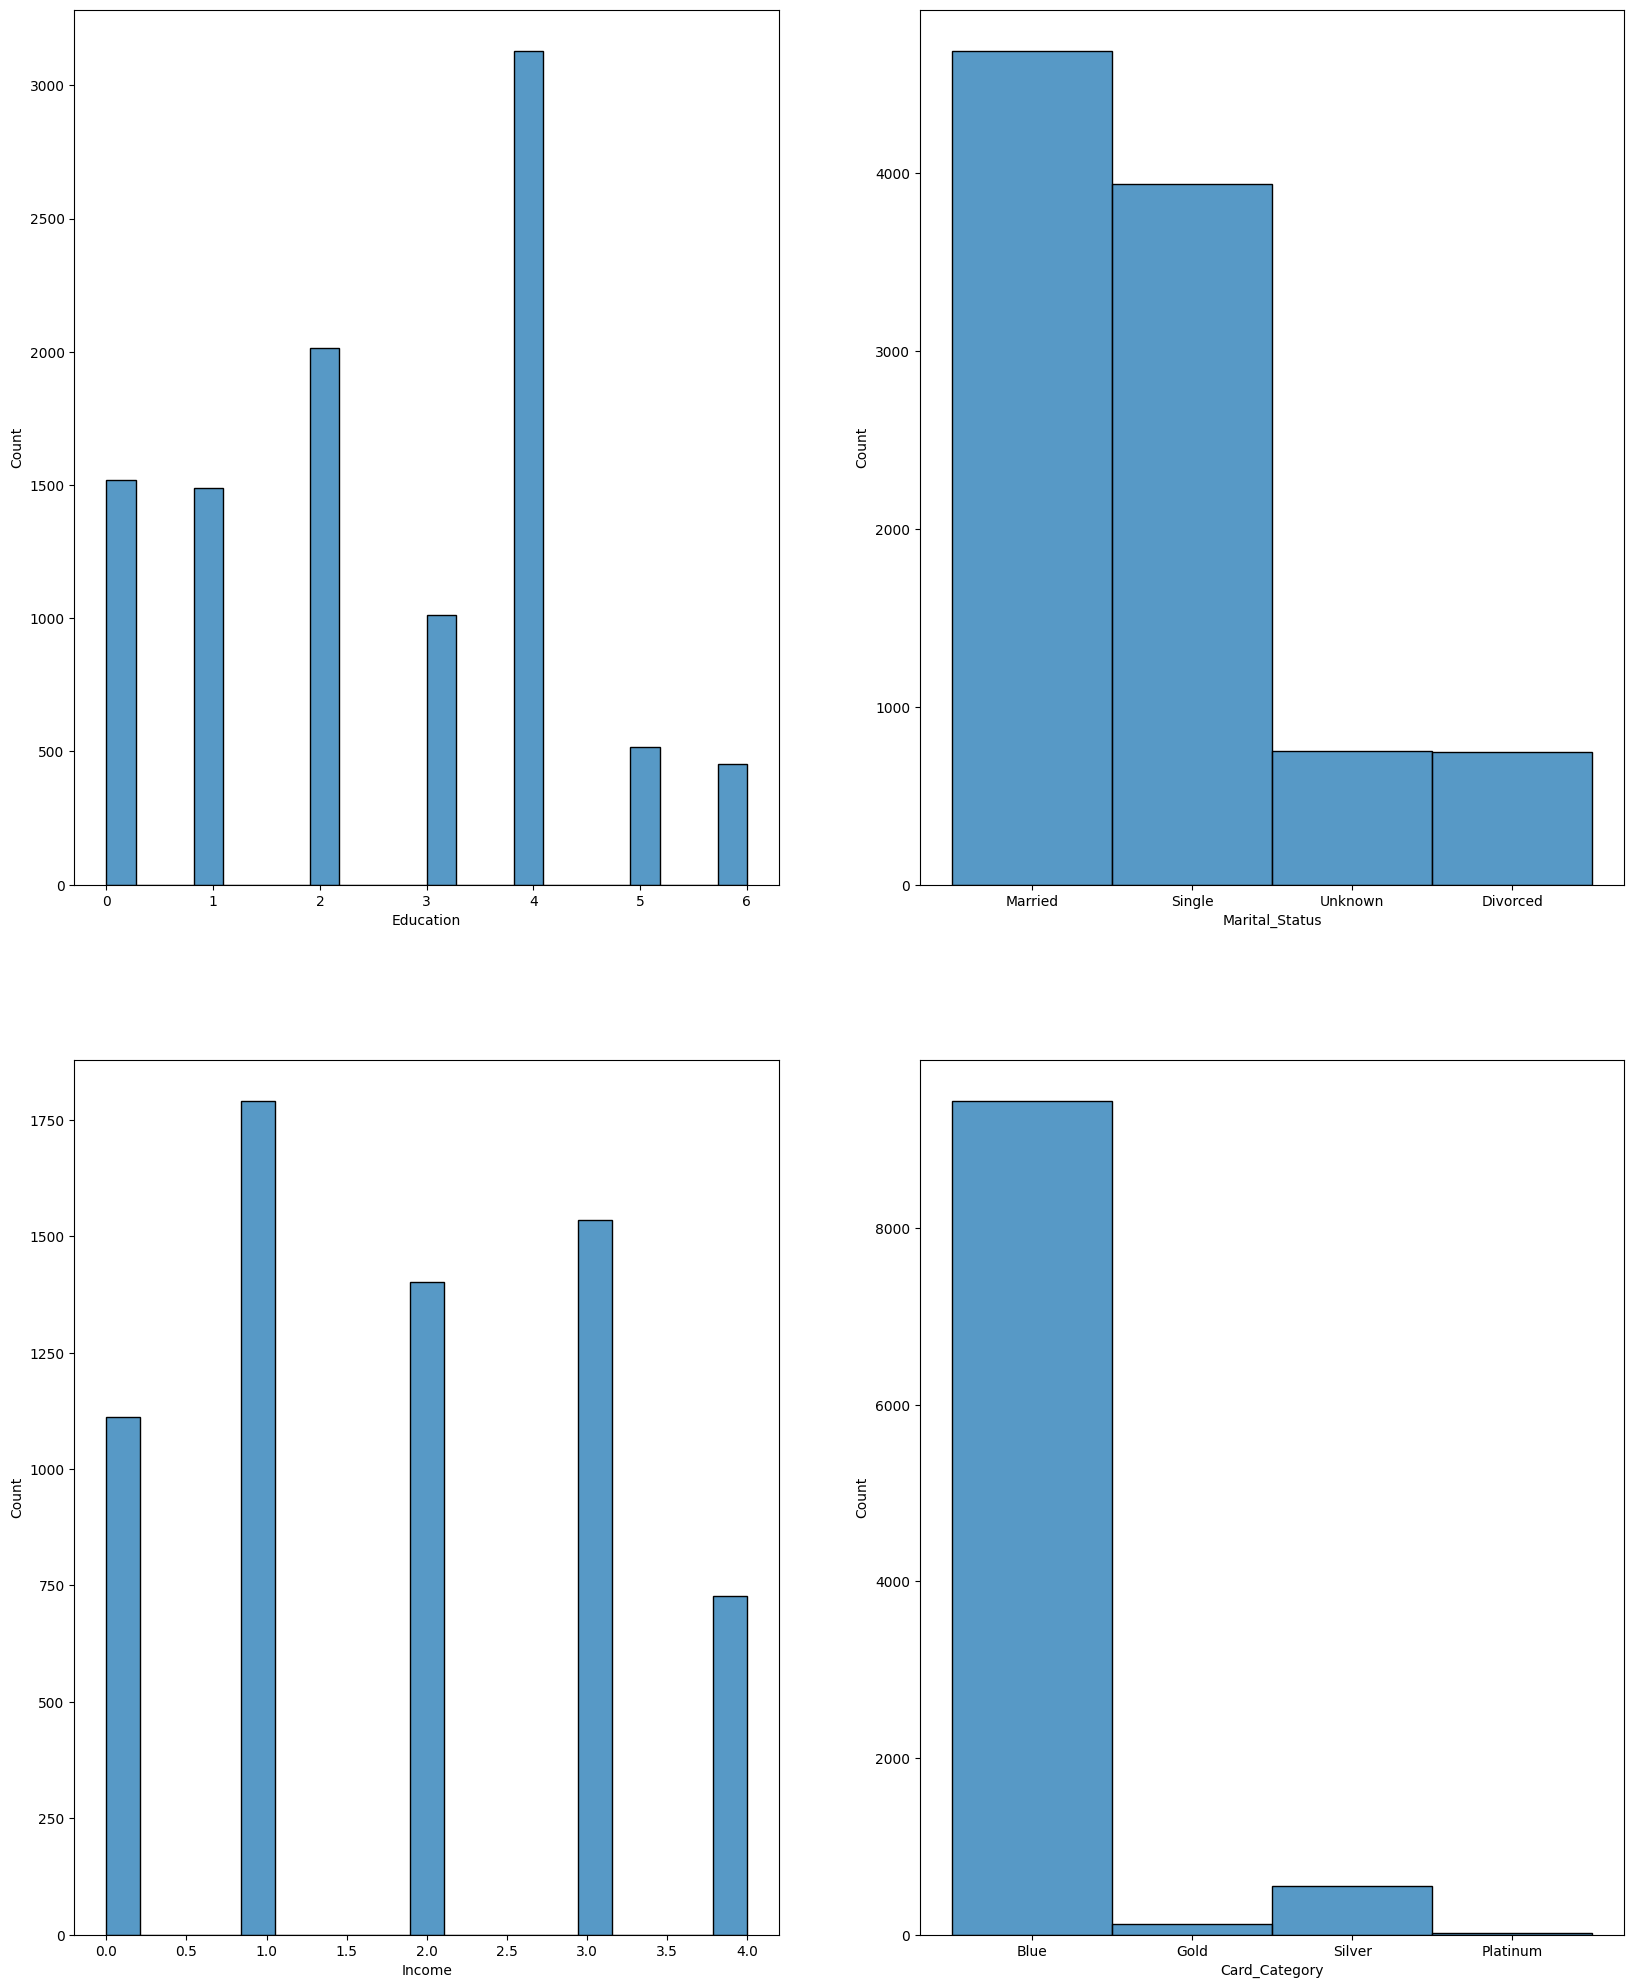

In [7]:
bar_columns = ["Education","Marital_Status","Income","Card_Category"]
if len(bar_columns) % 3 == 0:
    cols = 3
else:
    cols = 2
rows = ceil(len(bar_columns) / cols)
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=df[bar_columns[row*cols+col]], ax =axs[row][col])

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

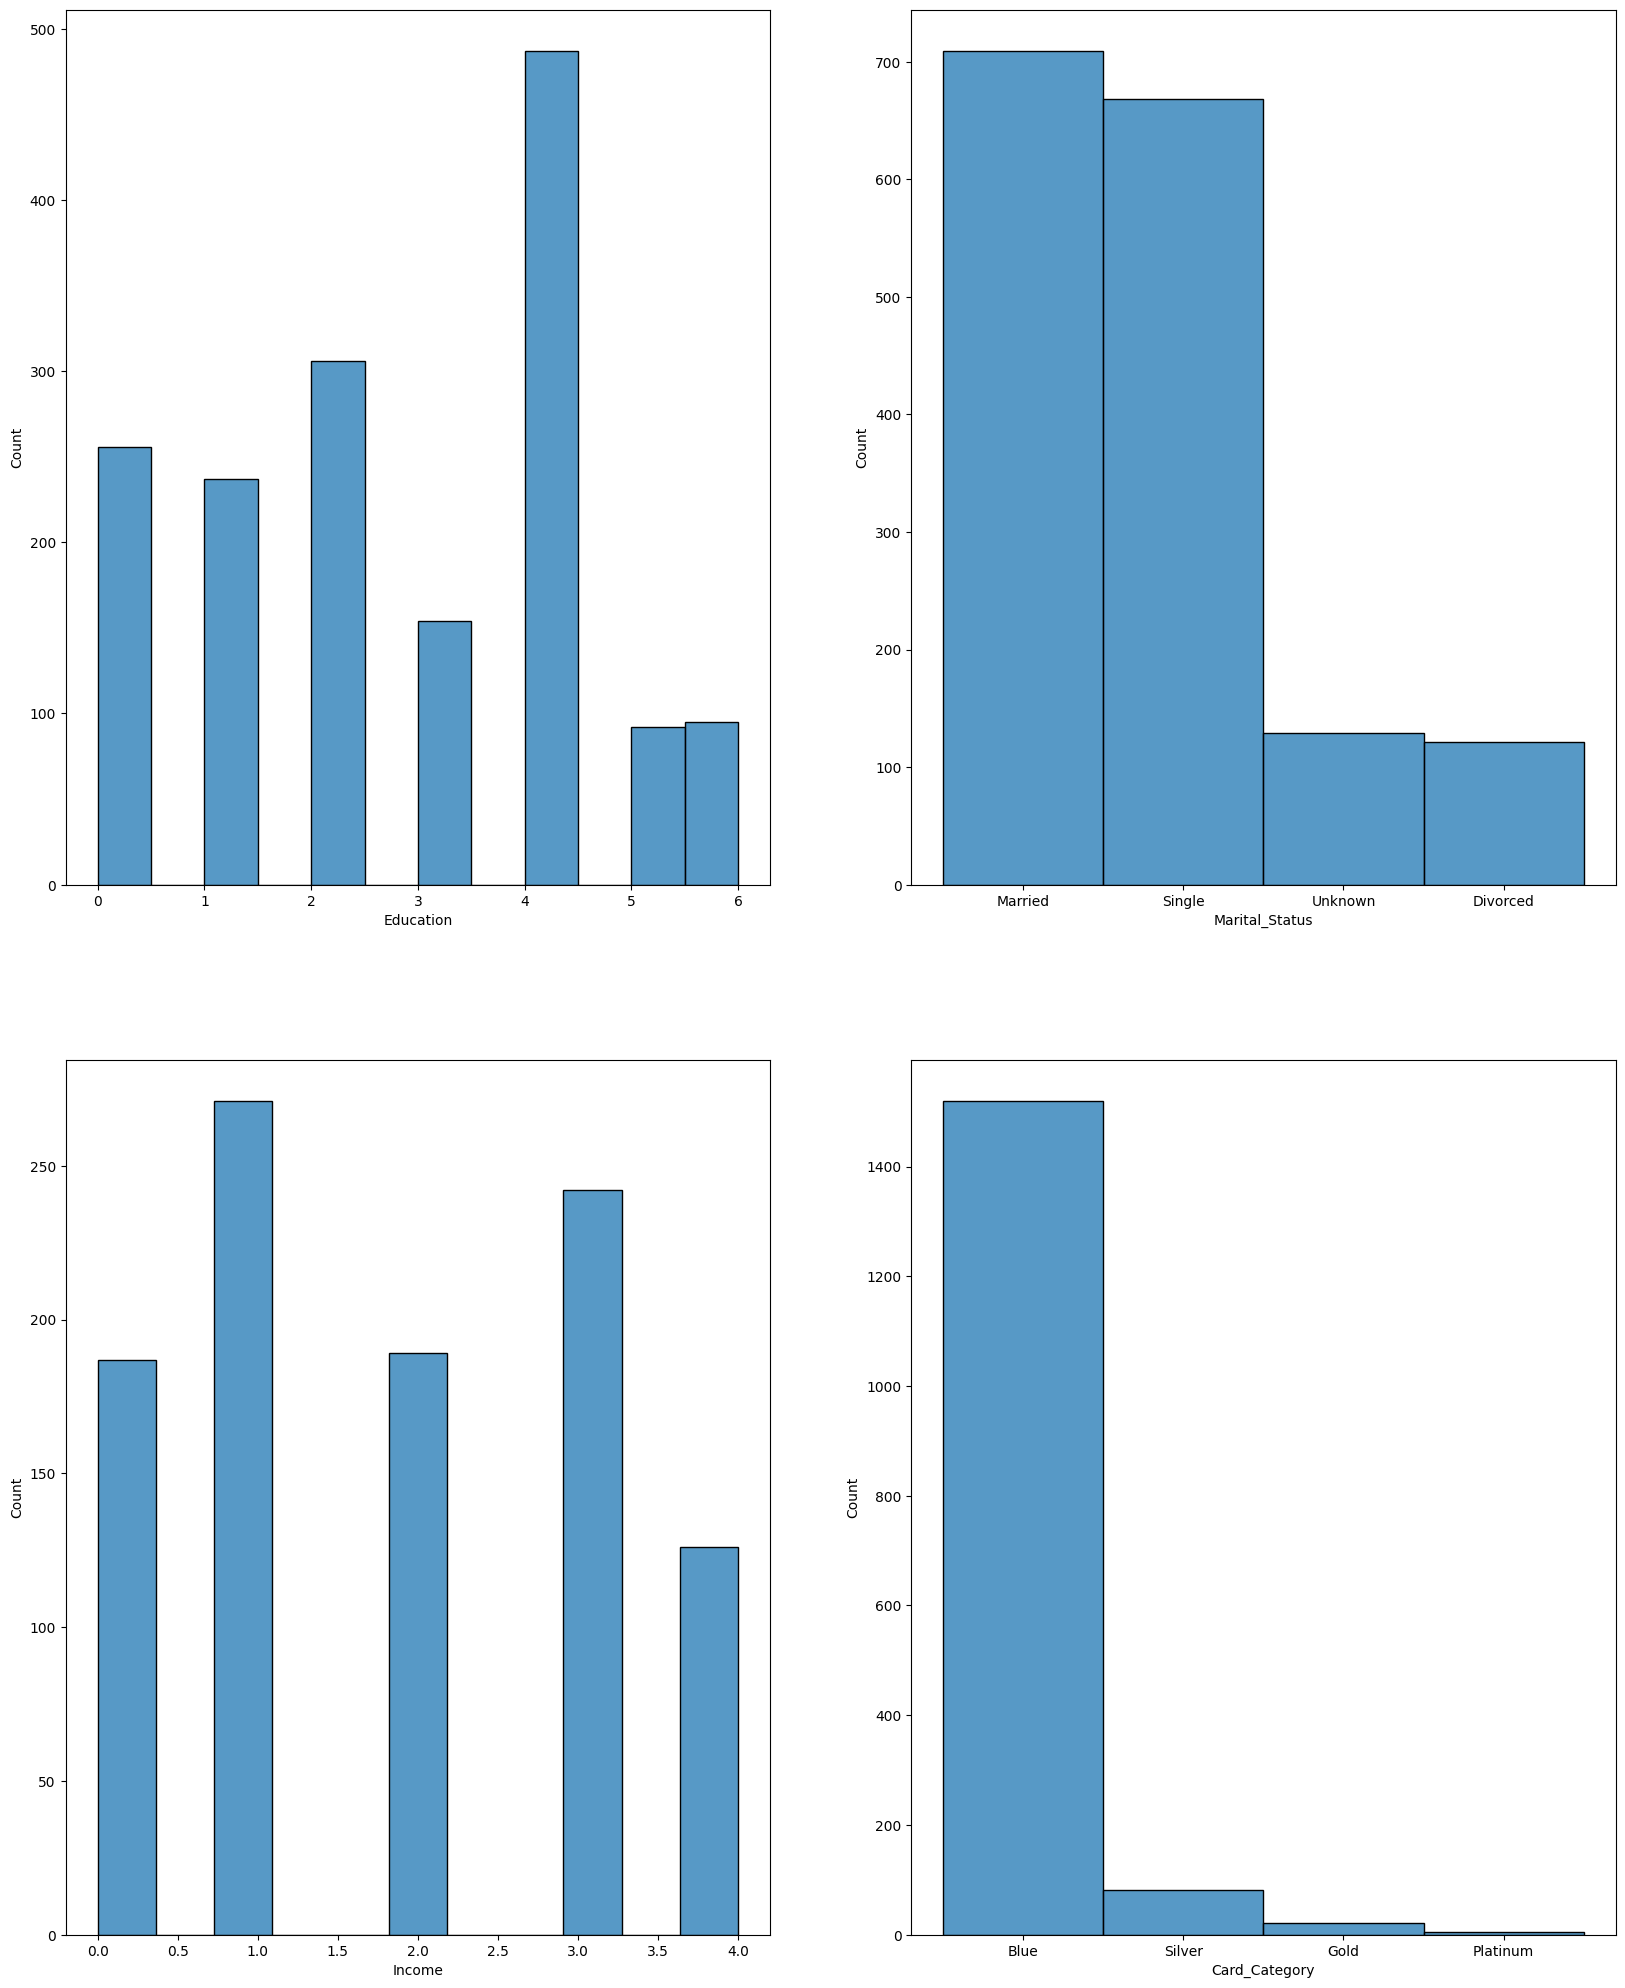

In [8]:
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=jump_ship[bar_columns[row*cols+col]], ax =axs[row][col])

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

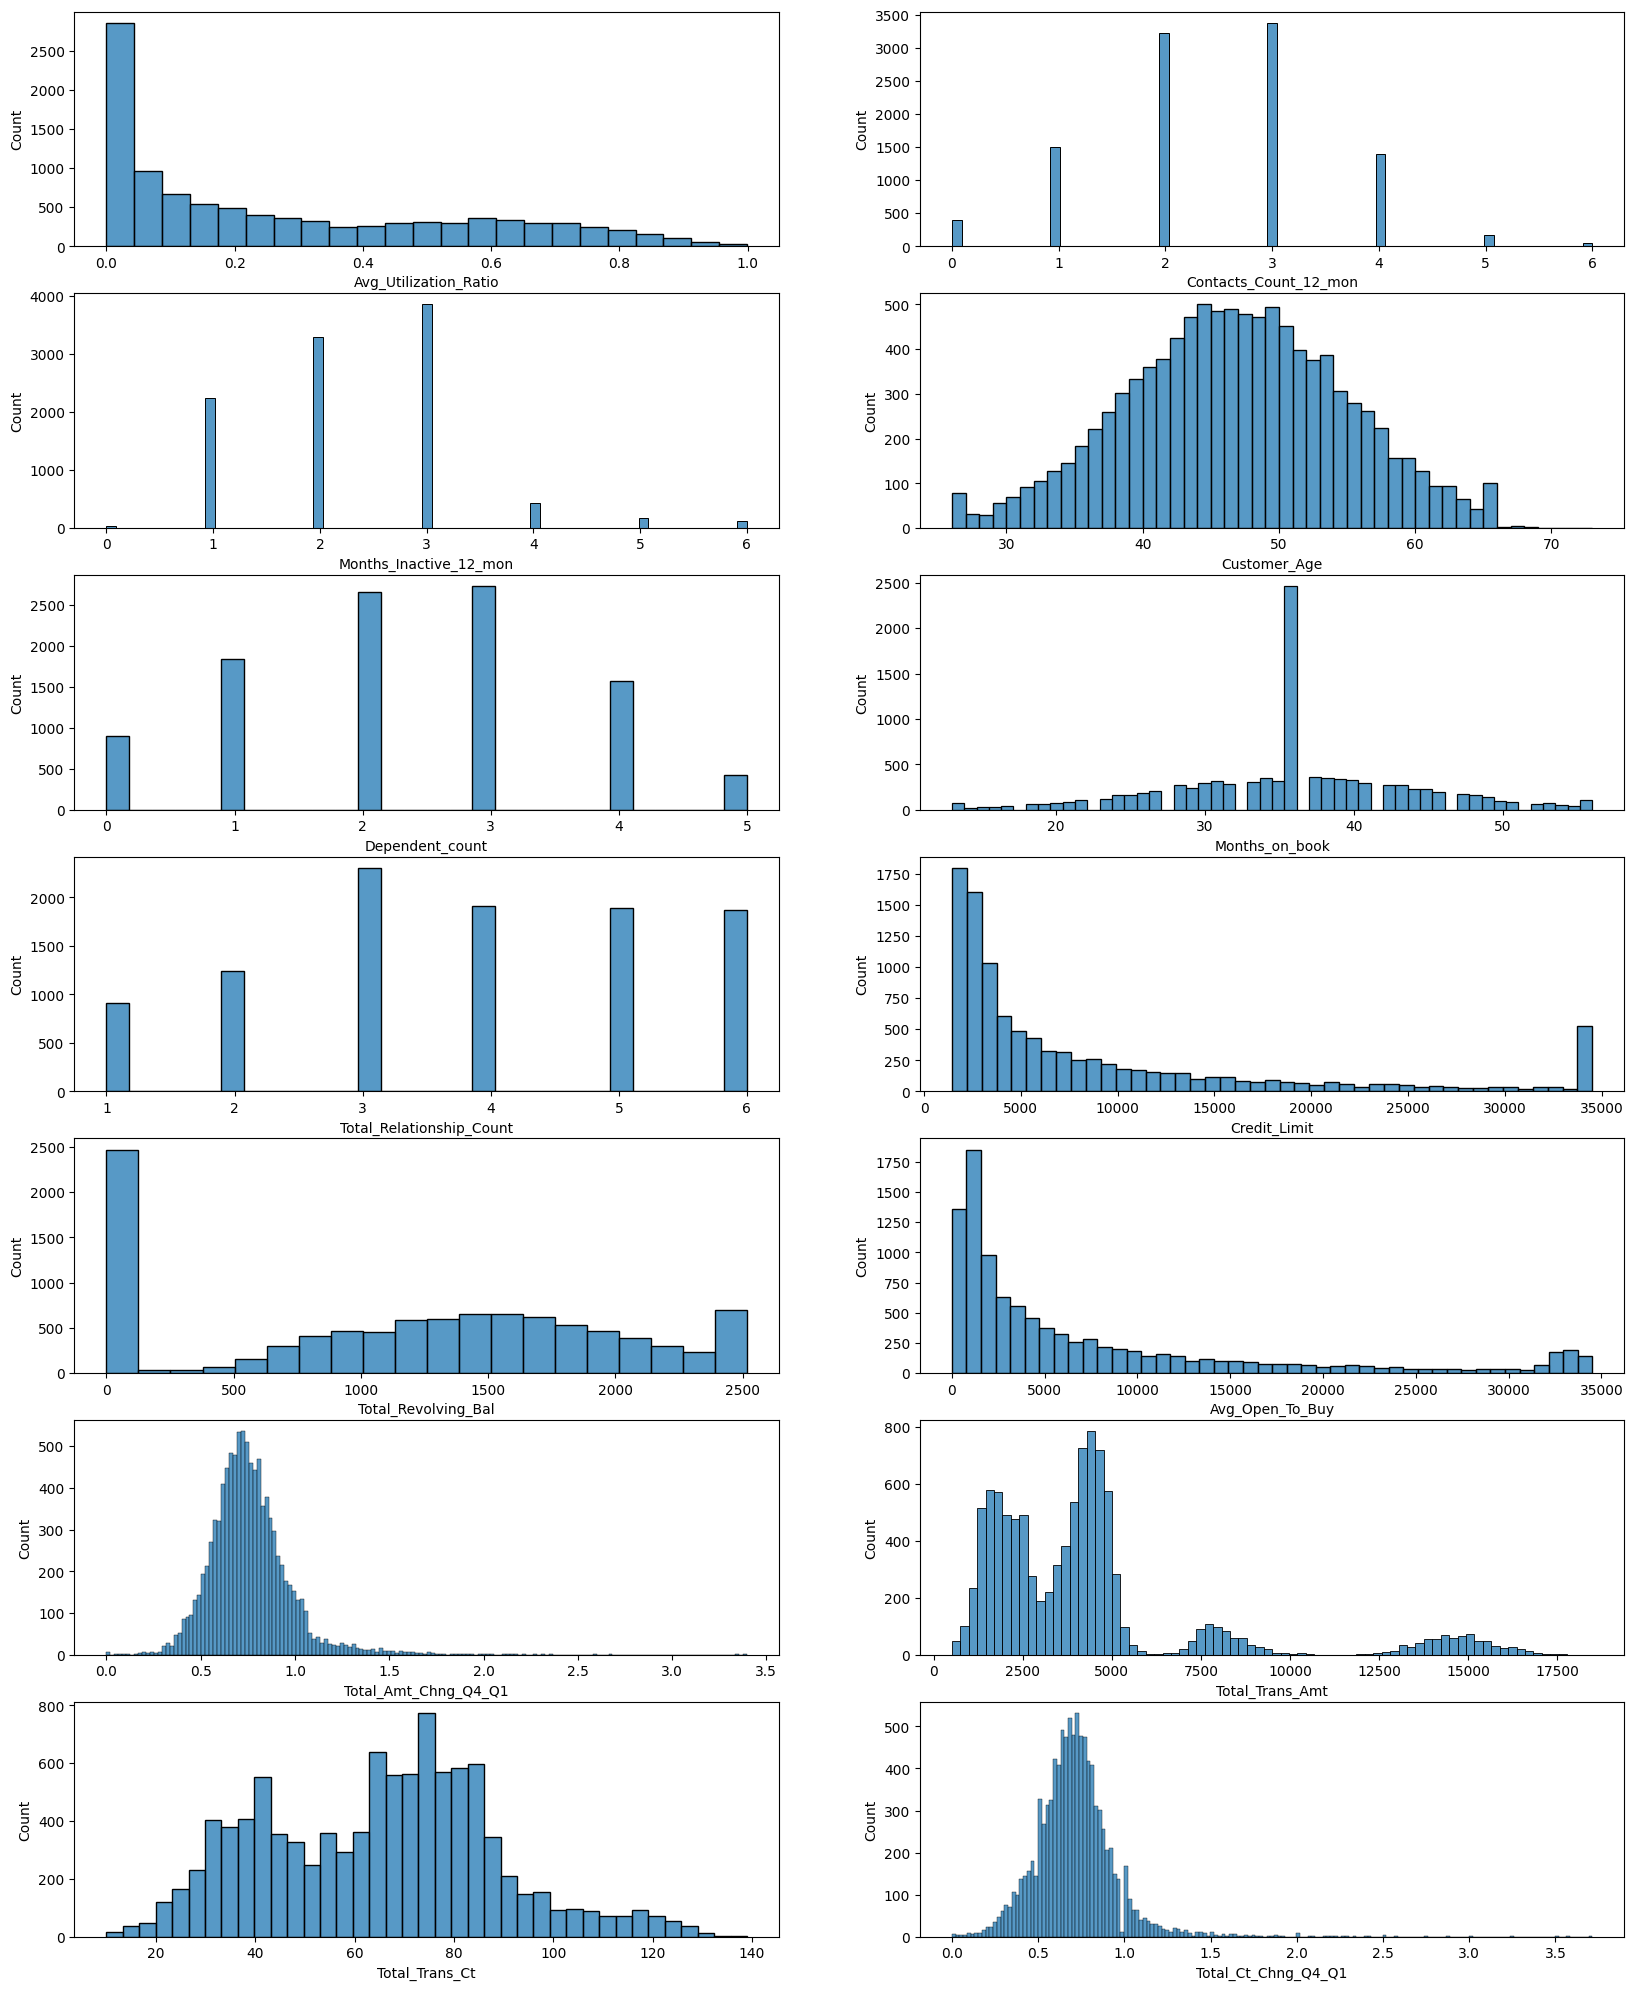

In [68]:
desired_columns = ["Avg_Utilization_Ratio","Contacts_Count_12_mon","Months_Inactive_12_mon","Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct","Total_Ct_Chng_Q4_Q1"]
if len(desired_columns) % 3 == 0:
    cols = 3
else:
    cols = 2
rows = ceil(len(desired_columns) / cols)
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=df[desired_columns[row*cols+col]], ax =axs[row][col])

Same graphics but for customer who have left

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

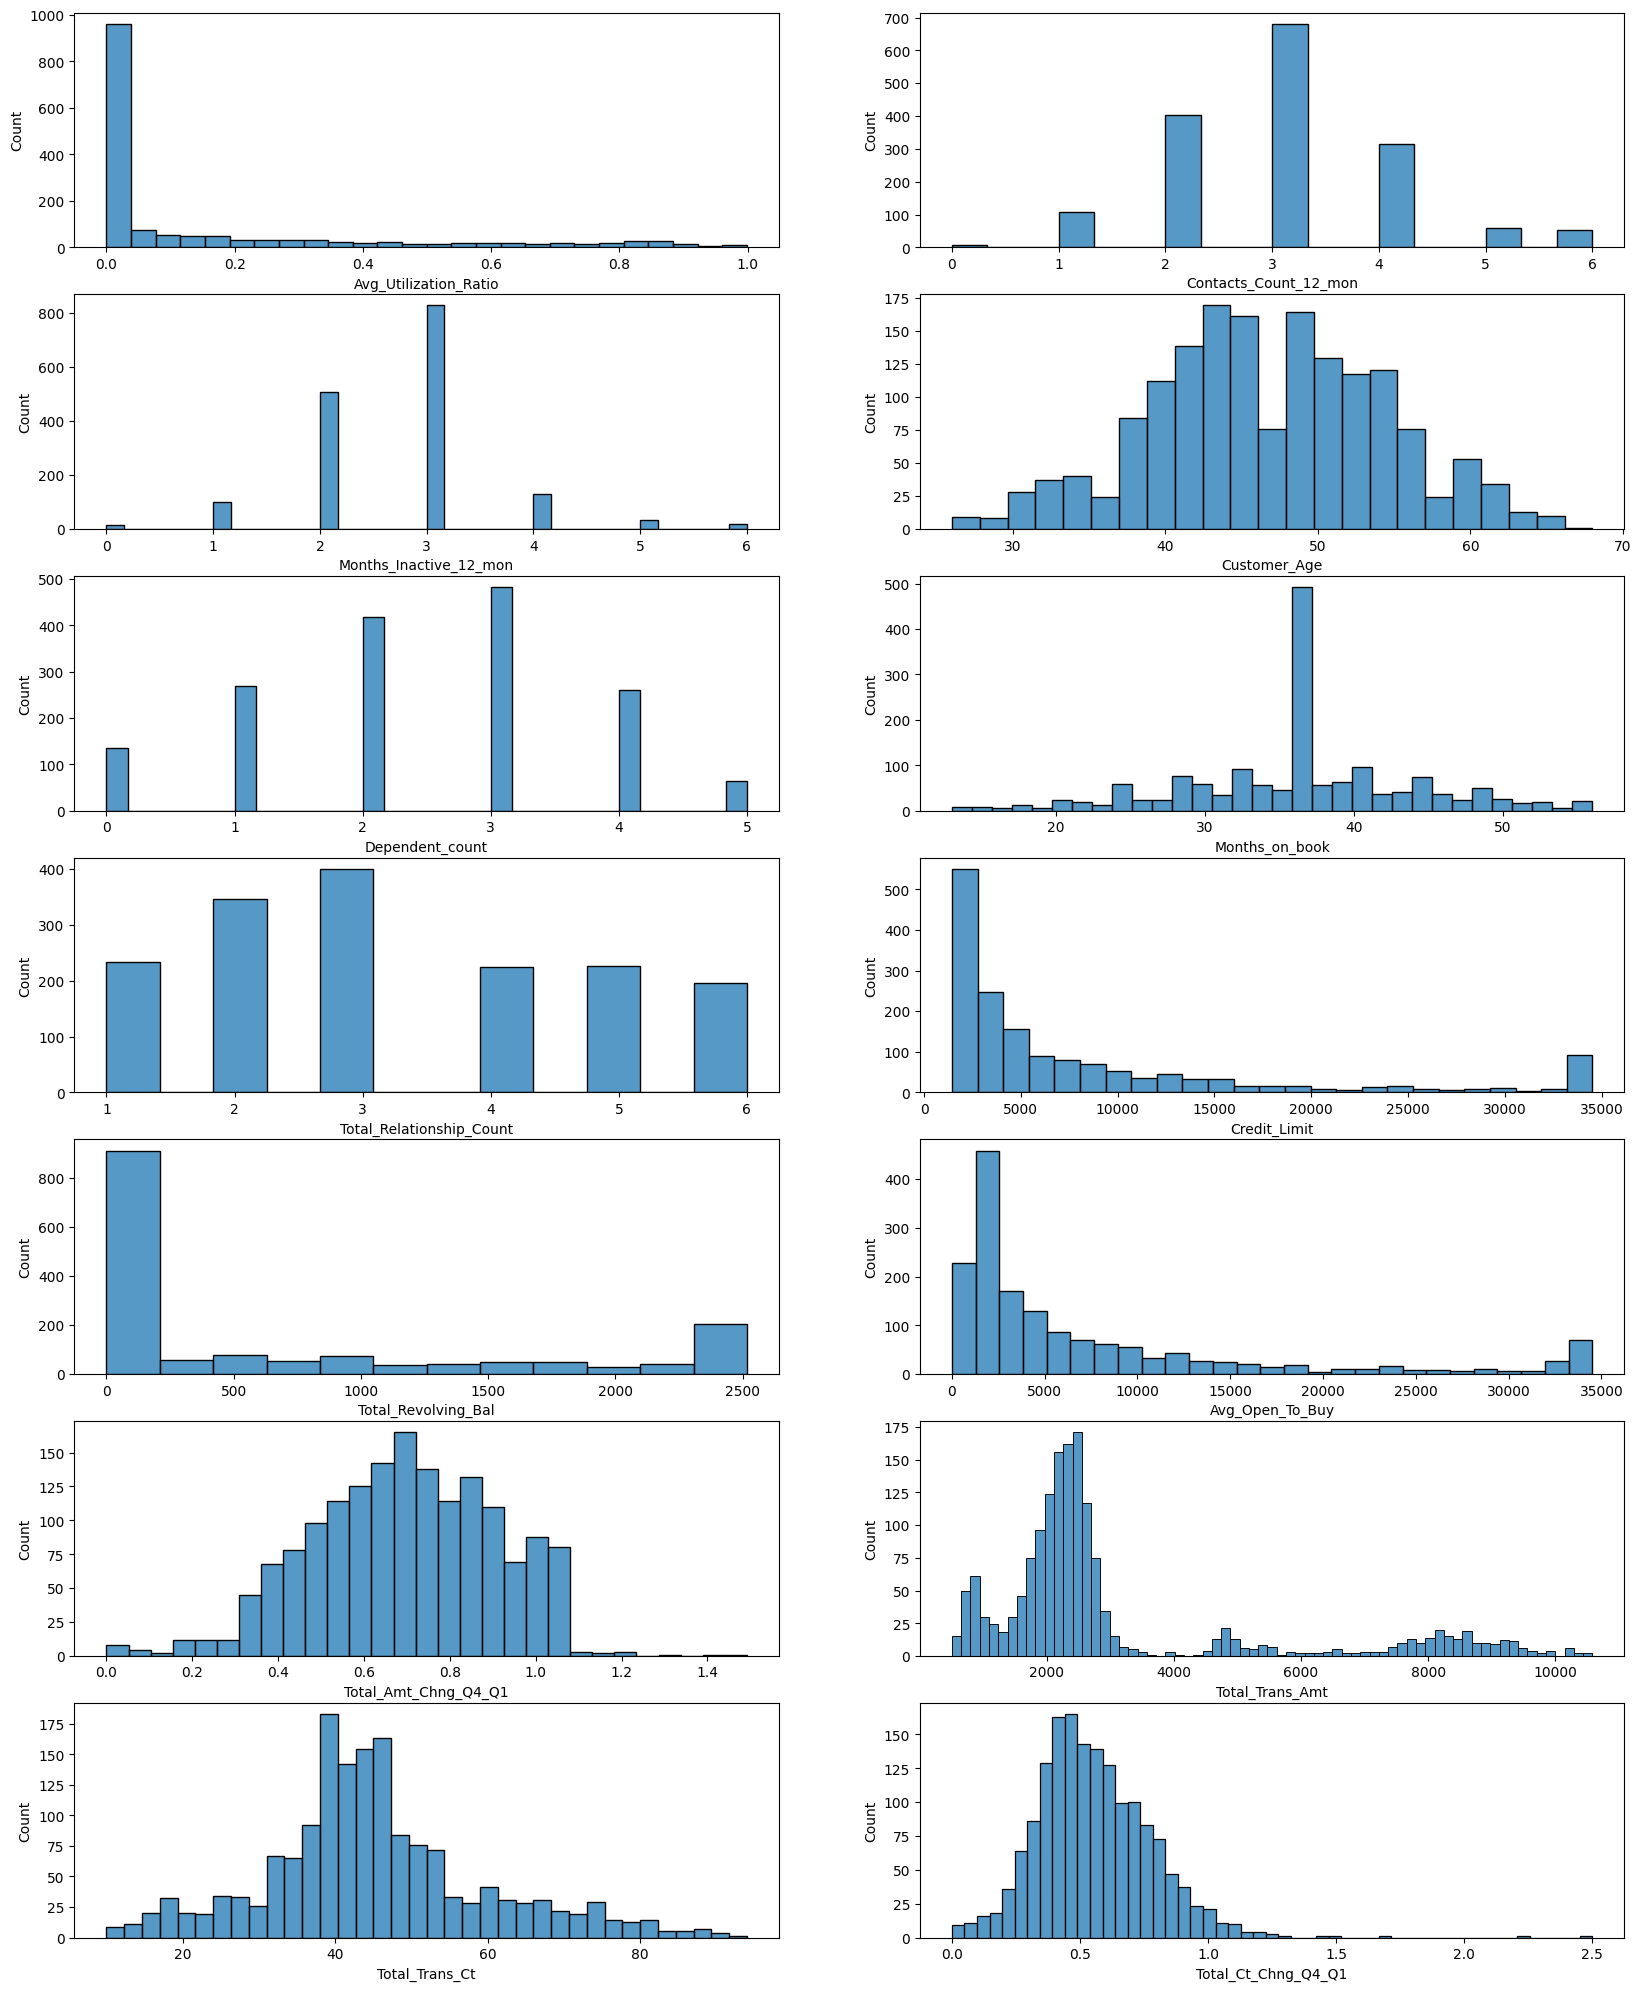

In [69]:
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=jump_ship[desired_columns[row*cols+col]], ax =axs[row][col])

# First observations

### Seems to be insightful about churn rate:

- Low Income
- Low utilization ratio
- Apparently more contacts last 12 months
- Total revolving balance. Seems to indicate that people who leave use their card less
- Total Relationship count (number of products from the bank customer uses)
- Total Transaction count/amount.

### Seems to not be related to churn rate:

- Months inactive.
- Age. Weird fun gap at late 40s, but probably due to chance. Need to be aware when modelling
- Dependent count
- Avg Open to buy. (Apparently it's unused balance, seems similar for now but worth digging deeper)


### Undecided:

- Months on book. Has the weird spike, looks like data flaw, needs further investigation.
- Credit limit. Does not look super impactful but worth a deeper look.
- Total transaction amount and change: Does not seem to be super impactful but worth more careful look

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Months_on_book', ylabel='Count'>

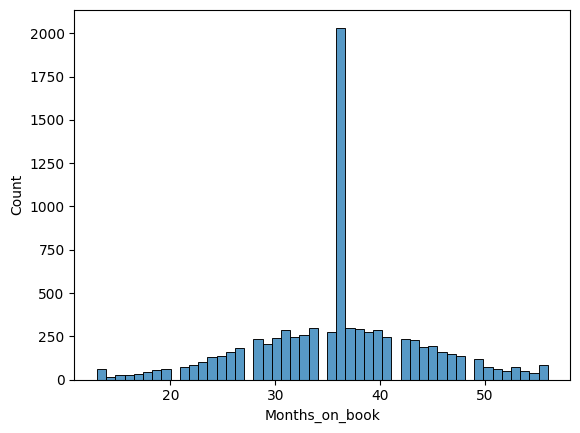

In [67]:
#Months on book, let's see if we can understand the spike at 3 years.
sns.histplot(data=loyal["Months_on_book"])